In [9]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib notebook

%load_ext autoreload
%autoreload 2

plt.ion()

from Magnets import Stick, B

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import sympy as sym

xs = sym.Symbol('x', real = True)
ys = sym.Symbol('y', real = True)
rs = xs + 1j * ys

## Realistic Model without Errors

In [10]:
phi0_raw = np.linspace(0,np.pi*2,17)[:-1] 
phi0 = phi0_raw
Mabs = 1.1
pos = np.exp(1j*phi0_raw)
def StrechModel(r,rs):
    return [Stick(rs,Mabs * np.exp(2j*phi0[i]),r*pos[i]) for i in range(16)]

In [11]:
r = 0.04
sm = StrechModel(r,0.005)

In [15]:
symB_sm = B(sm, rs, sym = True)

In [16]:
x = np.linspace(-r,r,15)
y = np.linspace(-r,r,15)

X,Y = np.meshgrid(x,y)
Z = X+1j*Y

Bnum_real = B(phalbach_real, Z)

NameError: name 'phalbach_real' is not defined

In [21]:
def PlotModel(phalbach, x =  np.linspace(-1,1,15), y = np.linspace(-1,1,15)):

    X,Y = np.meshgrid(x,y)
    Z = X+1j*Y
    fig = plt.figure('Model')
    fig.clf()
    Bnum = B(phalbach, Z)
    plt.quiver(Z.real, Z.imag, Bnum.real, Bnum.imag, pivot = 'mid', scale = 10)
    [p.plot() for p in phalbach]
    plt.xlabel("x")
    plt.ylabel("y")
    
    
from scipy.misc import factorial
def TaylorCoef(f, n = 1, z0 = 0):
    fa = [f]
    coef = [[sym.lambdify([xs,ys], f)(z0.real, z0.imag)]]
    for i in range(n):
        fa = [sym.diff(fa[0], xs)] + [sym.diff(f,ys) for f in fa]
        coef += [[sym.lambdify([xs,ys], f)(z0.real, z0.imag) for f in fa]]
    return coef

def Taylor(f, n = 1, z0 = 0):
    ct = TaylorCoef(f, n = n, z0 = z0)
    return sum([sum([ct[i][j]/factorial(j)/factorial(i - j)*xs**j * ys**(i-j)  for j in range(len(ct[i]))]) for i in range(len(ct))])

def getnthOrder(f, n,z0 = 0):
    ct = TaylorCoef(f, n = n, z0 = z0)
    return sum([ct[-1][j]/factorial(j)/factorial(n - j)*xs**(n - j) * ys**j  for j in range(len(ct[-1]))])

<IPython.core.display.Javascript object>


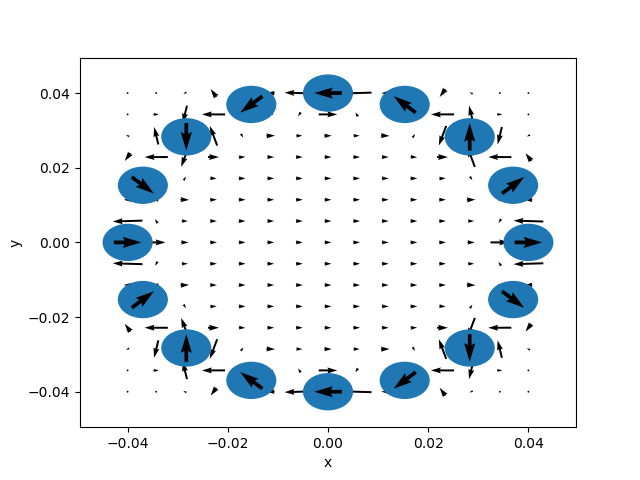

C:\Users\sauerwein_n\OneDrive\Projekte\WakeFieldAccelerator_PSI\Software\halbachring\Magnets.py:25: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(np.abs(r - self.z0) > self.R, np.conjugate(self.B_r/2*self.R**2/(r-self.z0)**2),0)
C:\Users\sauerwein_n\OneDrive\Projekte\WakeFieldAccelerator_PSI\Software\halbachring\Magnets.py:25: RuntimeWarning: invalid value encountered in true_divide
  return np.where(np.abs(r - self.z0) > self.R, np.conjugate(self.B_r/2*self.R**2/(r-self.z0)**2),0)


In [19]:
PlotModel(sm, x = x, y = y)

In [22]:
getnthOrder(symB_sm , n = 0)

0.1375 + 2.63877289708963e-17*I

In [23]:
xf = np.linspace(-r,r)
yf = np.linspace(-r,r)

ErrorPlot(sm, x = xf, y = yf)

NameError: name 'ErrorPlot' is not defined